# Grammys Project
![](https://www.moviedebuts.com/wp-content/uploads/2021/05/ra_ga_logo.png)

Are you excited to dive into data work for an exciting project at The Recording Academy? You know, the non-profit organization behind the Grammy Awards!

In this project, you'll work on real data from both websites owned by The Recording Academy, the non-profit organization behind the famous Grammy Awards. As you just learned, Ray Starck, the VP of Digital Strategy, decided to split the websites into grammy.com and recordingacademy.com to better serve the Recording Academy's various audience needs.

Now, you are tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior on both sites.  

Are you ready?!?!

Let's do this!

![](https://media.giphy.com/media/ZSK6UPKTSLZCKd7orz/giphy.gif)

## Data Dictionary
To start, you will be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part I - Exploratory Data Analysis

![](https://media.giphy.com/media/6y6fyAD9OIE6NvhJEu/giphy.gif)

## Task 1

Import the `pandas`,`numpy`, and `plotly.express` libraries.

In [64]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [65]:
# RUN THIS CELL - DO NOT MODIFY
# this formats numbers to two decimal places when shown in pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** For the `grammy_live_web_analytics.csv` file store that into a dataframe called `full_df`

**B.** For the `ra_live_web_analytics.csv` file store that into a dataframe called `rec_academy`

**C.** Preview the dataframes to familiarize yourself with the data.

All files needed can be found in the `datasets` folder.

In [66]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')

In [67]:
# preview full_df dataframe
full_df.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2017-01-01,9611,21407,10196,6490,86,0,0
1,2017-01-02,10752,25658,11350,7055,100,0,0
2,2017-01-03,11425,27062,12215,7569,92,0,0
3,2017-01-04,13098,29189,13852,8929,90,0,0
4,2017-01-05,12234,28288,12990,8105,95,0,0


In [68]:
# preview rec_academy dataframe
rec_academy.head()

,date,visitors,pageviews,sessions,bounced_sessions,avg_session_duration_secs,awards_week,awards_night
0,2022-02-01,928,2856,1092,591,148,0,0
1,2022-02-02,1329,3233,1490,923,90,0,0
2,2022-02-03,1138,3340,1322,754,127,0,0
3,2022-02-04,811,2552,963,534,142,0,0
4,2022-02-05,541,1530,602,326,111,0,0


## Task 3

We all know The Grammy Awards is *the* biggest music event in the music industry, but how many visitors does that bring to the website?

**A.** Create a line chart of the number of users on the site for every day in the `full_df`. See if you can spot the days the Grammys awards are hosted.

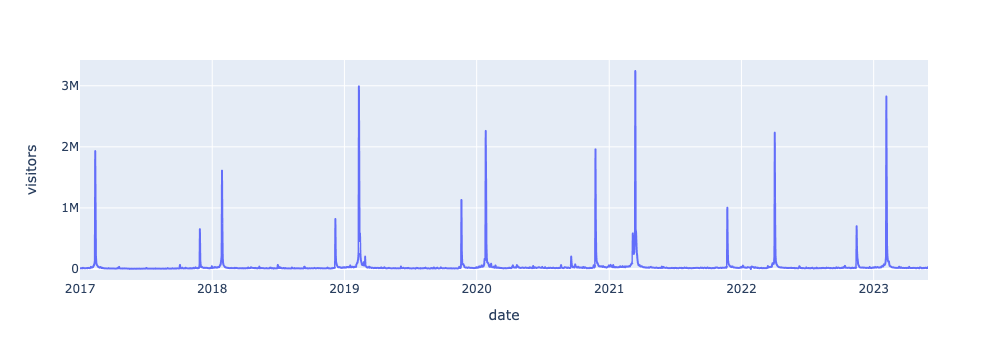

In [69]:
# Plot a line chart of the visitors on the site.
px.line(full_df, x='date', y='visitors')

<span style='background :#FFF59E'>**Remark:** The smaller spikes, typically around November/December of each year, are when the nominees are announced.</span>

**B.** What can you say about the visitors to the website by looking at the graph?

The months with the largest spikes are in January, February, March, and April. It can be inferred that the grammies occurred around these months. In addition, the smaller spikes occurrs around November and December given that this is when nominees are announced. (end of the years = nominees announced, beginning of years = grammies take place)

## Task 4

Let's investigate what an "average" day looks like when the awards show is being hosted versus the other 364 days out of the year.

**A.** Use the pandas `.groupby()` to calculate the number of visitors on the site based on the values in the column `awards_night`.

In [70]:
full_df.groupby('awards_night').agg({'visitors': 'mean'})

,visitors
awards_night,
0,32388.28
1,1389590.23


**B.** What can you say about these results? Roughly how many more visitors are on the website for the awards ceremony versus a regular day?

During a award ceremony night there is 42x more visitors on the website then there is on a regular day.

<span style='background :#FFF59E'>**Remark:** This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of **one** event per year into one that continues to bring users back on the site year round?</span>

## Task 5

When The Recording Academy decided to split their website into two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. So the `full_df` variable needs to be split separately into two dataframes. The day the domains were switched is on `2022-02-01`.

Create two new dataframes:

1. `combined_site` for all dates before `2022-02-01`
2. `grammys` for all dates after (and including) `2022-02-01`

In [71]:
# Split the data to separate the full_df into two new dataframes.
# One for before the switch of the websites and one for after
combined_site = full_df[full_df['date'] < '2022-02-01']
grammys = full_df[full_df['date']>='2022-02-01']


In [72]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a scary-looking warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [73]:
# print the shape of the combined_site dataframe
combined_site.shape

(1857, 8)

<span style='background :#DDD5F3'>If done correctly, the `combined_site` dataframe should have a total of `1857` rows and `8` columns</span>

# Part II - It's all about KPIs

![](https://media.giphy.com/media/zoKdmndB8QBR2c0gjy/giphy.gif)

There are certain key performance indicators (KPIs) of interest for The Recording Academy. Let's investigate those a little more.

## Task 6

**A.** Create a new list called `frames` that has the `combined_site`, `rec_academy`, and `grammys` dataframes as entries. e.g. If the 3 dataframes were `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

In [74]:
# create the list of dataframes
frames = [combined_site, rec_academy, grammys]
print(frames)

[            date  visitors  pageviews  sessions  bounced_sessions  \
0     2017-01-01      9611      21407     10196              6490   
1     2017-01-02     10752      25658     11350              7055   
2     2017-01-03     11425      27062     12215              7569   
3     2017-01-04     13098      29189     13852              8929   
4     2017-01-05     12234      28288     12990              8105   
...          ...       ...        ...       ...               ...   
1852  2022-01-27         2          2         2                 2   
1853  2022-01-28     32986      79160     36571             20268   
1854  2022-01-29     37899      79095     41920             25316   
1855  2022-01-30     39931      81186     43743             26636   
1856  2022-01-31     38221      92863     42291             21747   

      avg_session_duration_secs  awards_week  awards_night  
0                            86            0             0  
1                           100            0    

**B.** For each frame in the frames list, create a new column `pages_per_session`. This new column is the average number of pageviews per session on a given day. The higher this number the more "stickiness" your website has with your visitors.

<span style='background :#FFF59E'>**Hint:** Divide the `pageviews` by `sessions`</span>

This can be achieved by using the following template:

```python
for frame in frames:
    frame['new_col'] = frame['col_A'] / frame['col_B']
```

In [75]:
# create the `pages_per_session` column for all 3 dataframes.
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

**C.** Visualize this new metric using a line chart for each site. (You will have 3 separate graphs)

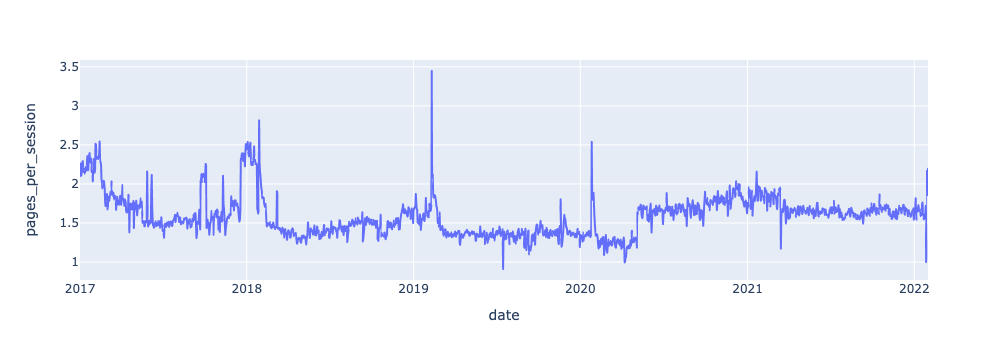

In [76]:
# combined_site graph
px.line(combined_site, x='date', y='pages_per_session')

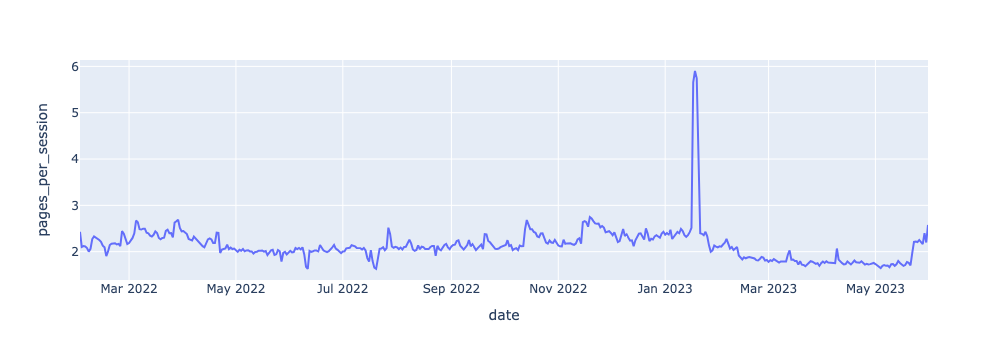

In [77]:
# grammys graph
px.line(grammys, x='date', y='pages_per_session')

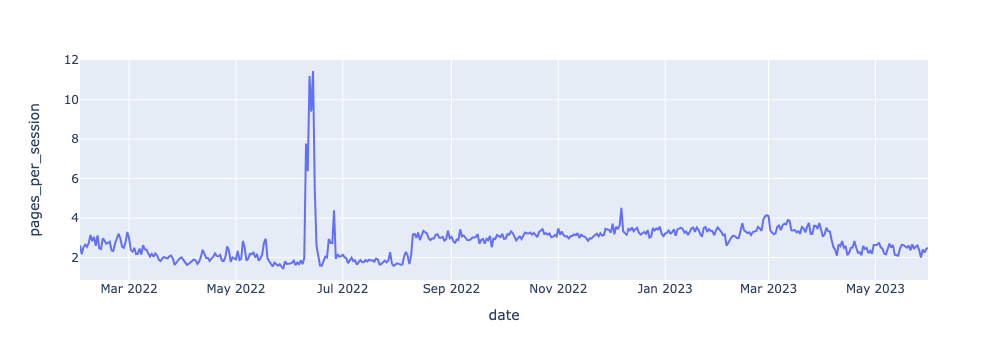

In [78]:
# rec_academy graph
px.line(rec_academy, x='date', y='pages_per_session')

**D.** Looking at the 3 charts above, what can you say about the `pages_per_session` when the websites were combined versus after they were split?

<span style='background :#FFF59E'>**Note:** Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.</span>

When the sites are combined it shows more frequent spikes in paage veiws per session through out the time of grammy nominations and the occurance of the grammies. Where as when the sites were split it only shows one drastic spike during one point of time.

## Task 7

Bounce rate is another important metric for The Recording Academy. Bounce Rate is a measure of the percentage of visitors who come to the site and *never  interact with the website and leave*. In this task, you will define a function that takes in a dataframe as input and outputs the bounce rate.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`


<span style='background :#FFF59E'>**Hint:** You will need use the `.sum()` function both in the `sum_bounced` and `sum_sessions` calculations. Don't forget to multiply by `100` so that the answer appears as a percentage instead of a decimal.</span>

In [79]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    # WRITE YOUR CODE BELOW
    # Remember, the input for the function is called `dataframe`
    # So all calculations should reference that variable.

    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    
    return((sum_bounced / sum_sessions)*100)



**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

A template for getting the function to work will look like code below. Remember that this is NOT the print statement, you will still need to add that part.

<span style='background :#FFF59E'>**Hint:** To get the bounce rate use `bounce_rate(frame)` </span>

```python
for frame in frames:
    my_value = my_function(frame)
```

<span style='background :#FFF59E'>**Tip:** If you want to reduce the number of decimals shown in an f-string, you can add `:0.2f` just before the end of the curly brackets but after your variable. Example: `print(f'my value is: {my_value:0.2f}')`</span>

In [84]:
# Calculate the Bounce Rate for each site. Use the frames list you created in Task 6.
frame_names = ["combined", "rec_academy", "grammys"]
frames = [combined_site, rec_academy, grammys]

n = 0

for frame in frames:
    name = frame_names[n]
    rate = bounce_rate(frame)
    print(f"{name}'s bounce rate is: {rate:0.2f}")
    n += 1

combined's bounce rate is: 41.58
rec_academy's bounce rate is: 33.67
grammys's bounce rate is: 40.16


<span style='background :#DDD5F3'>If done correctly, the `combined_site` and `grammys` site will each have bounce rates in the low 40s. The `rec_academy` will have a bounce rate in the low 30s</span>

**C.** Another useful metric is how long on average visitors are staying on the website.

Calculate the `mean` of the `avg_session_duration_secs` for each of the sites.
Print each one using an f-string.

In [89]:
# Calculate the average of the avg_session_duration_secs. Use the frames list you created in Task 6.
frames = [combined_site, rec_academy, grammys]

n = 0

for frame in frames:
    name = frame_names[n]
    mean = frame['avg_session_duration_secs'].mean()
    print(f"{name}'s average session duration (secs) is: {mean:0.2f}")
    n += 1


combined's average session duration (secs) is: 102.85
rec_academy's average session duration (secs) is: 128.50
grammys's average session duration (secs) is: 82.99


**D.** What can you say about these two metrics as it relates to each of the websites?
Based on these two metrics it shows us that rec academy have a longer average session duration by 50% in comparison to the grammy's duration. Hand in hand, the bounce rate for the rec academy is lower which indicates their visitors are more active on their website. As a result, we can conclude that longer session durations means greater quality visits.

# Part III - Demographics

![](https://media.giphy.com/media/GrUhLU9q3nyRG/giphy.gif)

Age demographics are a way to see which audience(s) your content is resonating with the most. This can inform marketing campaigns, ads, and much more.

Let's investigate the demographics for the two websites. This will require reading in two new files and joining them in python.

## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [20]:
# read in the files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')

In [21]:
# preview the age_grammys file. the age_tra will look very similar.
age_grammys.head()

,age_group,pct_visitors
0,18-24,27.37
1,25-34,24.13
2,35-44,18.72
3,45-54,13.57
4,55-64,9.82


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [22]:
# create the website column
age_grammys['website'] ='Grammys'
age_tra['website'] = 'Recording Academy'


**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<span style='background :#FFF59E'>**Hint:** Remember that you need to put your dataframe variables inside of a **list** first then pass that as your input of `pd.concat()`</span>

In [23]:
# use pd.concat to join the two datasets
age_df = pd.concat([age_grammys, age_tra])
age_df.shape


(12, 3)

<span style='background :#DDD5F3'>If done correctly your new dataframe will have `12` rows and `3` columns.</span>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.

<span style='background :#FFF59E'>**Hint:** You will need to use the `barmode='group'` option in `px.bar()`. See the code snippet below to guide you.</span>

```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

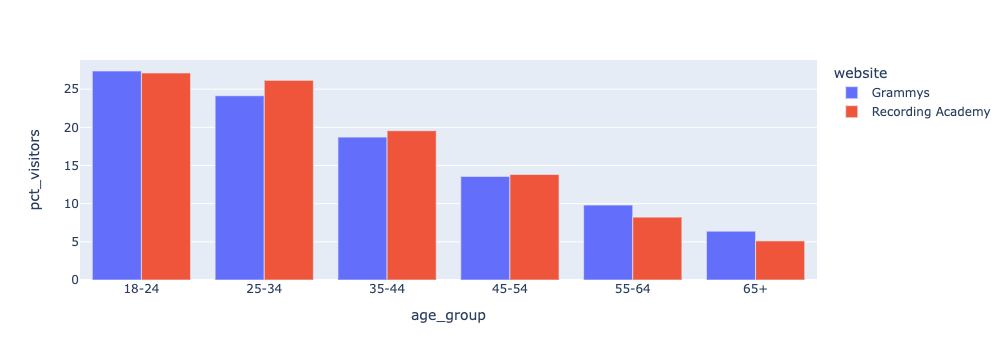

In [24]:
# Create bar chart
px.bar(age_df, x='age_group', y='pct_visitors', color='website', barmode='group')


**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

The majority of the demographics of visitors tend to be people in the early adulthood group and as the age increases the website visit count seem to decrease as well. In comparison of the two websites their visitor counts seem to share a very similar relationship, which may have you question if visitors are visiting both sites.

# Part IV - Recommendation
![](https://media.giphy.com/media/0Av9l0VIc01y1isrDw/giphy.gif)

## Task 9

Using the work you did in this project, would you recommend that the websites stay separate? Please give a 2-3 paragraph answer using details from the analysis work above explaining why or why not they should stay separate.

    Based on the data and my personal view on the websites, I believe that it should stay seperated instead of combined. With the websites seperated it shows greater consumption of visitor's interactivity and "stickiness" the websites would had if it was combined. For example, with the websites seperated the all time peak page view of recording academy is 11.4 pages and the Grammy's website had a peak of 5.9. Where as, if the sites were to be combined the peak would only be 3.4 making that nearly twice as lower than Grammy's peak and 4 times lower than recording academ'ys peak when they are seperated. As a result, it shows that the visitors were more hooked onto the site and explored more pages from the websites when they are seperated. 
    Furthermore, the bounce rate, a rate that determines the visitor's interactivity and or "quality visits" on the sites. Shows use that the rate of both sites seperated provided higher quality visits than combined together. For example, the Grammy's bounce rate is 40.16 and the Recording Academy's rate is 33.67. On the other hand, combined bounce rate is 41.58. Showing us that of the three sites the combined sites offered lower quality visits. In addition, with the sites seperated, it would induce less traffic on the sites which would provide visitors faster respond time, quality functioning, and ultimately, better user experience. 


# LevelUp
![](https://media.giphy.com/media/6fUIhrlrHCzEHvY8oF/giphy.gif)

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your task is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.

![](figs/TheAMAs.png)

Let's review some of the content from above.

The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [25]:
# Load in the data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')


In [26]:
# preview the desktop_users file
desktop_users.head()

,date,segment,visitors
0,2022-02-01,Desktop Traffic,10195
1,2022-02-02,Desktop Traffic,10560
2,2022-02-03,Desktop Traffic,9935
3,2022-02-04,Desktop Traffic,8501
4,2022-02-05,Desktop Traffic,5424


In [27]:
# preview mobile_users file
mobile_users.head()

,date,segment,visitors
0,2022-02-01,Mobile Traffic,23494
1,2022-02-02,Mobile Traffic,20234
2,2022-02-03,Mobile Traffic,22816
3,2022-02-04,Mobile Traffic,18592
4,2022-02-05,Mobile Traffic,13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [28]:
# change name of the visitors column to indicate which category it comes from
desktop_rename = desktop_users.rename(columns={'visitors': 'desktop_visitors'}, inplace= True)
mobile_rename = mobile_users.rename(columns={'visitors': 'mobile_visitors'}, inplace= True)




In [29]:
# drop the segment column from each dataframe
desktop_drop= desktop_users.drop(columns='segment', inplace= True)
mobile_drop= mobile_users.drop(columns='segment', inplace= True)




**C.** Join the two dataframes together in a new variable called `segment_df`.

In [30]:
# join the two dataframes and preview the dataframe
segment_df = pd.concat([desktop_users, mobile_users], axis=1)
print(segment_df.head())



         date  desktop_visitors        date  mobile_visitors
0  2022-02-01             10195  2022-02-01            23494
1  2022-02-02             10560  2022-02-02            20234
2  2022-02-03              9935  2022-02-03            22816
3  2022-02-04              8501  2022-02-04            18592
4  2022-02-05              5424  2022-02-05            13298


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [31]:
# create total_visitors column
segment_df['total_visitors']  = segment_df['desktop_visitors'] + segment_df['mobile_visitors']
print(segment_df)


           date  desktop_visitors        date  mobile_visitors  total_visitors
0    2022-02-01             10195  2022-02-01            23494           33689
1    2022-02-02             10560  2022-02-02            20234           30794
2    2022-02-03              9935  2022-02-03            22816           32751
3    2022-02-04              8501  2022-02-04            18592           27093
4    2022-02-05              5424  2022-02-05            13298           18722
..          ...               ...         ...              ...             ...
510  2023-06-26              4302  2023-06-26             7327           11629
511  2023-06-27              5528  2023-06-27             9491           15019
512  2023-06-28              4928  2023-06-28             9856           14784
513  2023-06-29              5554  2023-06-29            12881           18435
514  2023-06-30              6336  2023-06-30            14446           20782

[515 rows x 5 columns]


To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.

In [147]:
# filter and calculate the percentage share

segment_df2 = segment_df.iloc[:, 429:]

segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']

segment_df['desktop_percentage'] = (segment_df['desktop_visitors'] / segment_df['total_visitors']) * 100

segment_df['mobile_percentage'] = (segment_df['mobile_visitors'] / segment_df['total_visitors']) * 100

segment_df2.head()





""
0
1
2
3
4


**What is the percentage share of desktop and mobile visitors on the Grammys website in the timeframe in question?**
The percentage of mobile visitors is 77.47 and percentage of desktop visitors is 22.53
**What is the total number of visitors on the site during this timeframe?**

The percentage of total number of visitors on the site during this time frame is 12386

**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

In comparison to its competitors the Grammy's have's better quality visits based off of the bounce rate provided from the competitors above but, the Grammy's could improve their website interactivity to increase visitor sessions.